# LCLS cu_hxr from archived data

In [1]:
import lcls_live
import os
os.__file__

'/Users/mpe/miniconda3/envs/lcls-live-dev/lib/python3.8/os.py'

In [2]:
import matplotlib
# Useful for debugging
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [3]:
%matplotlib inline

In [4]:
from lcls_live.datamaps import get_datamaps
from lcls_live.archiver import lcls_archiver_restore

import os

In [5]:
BEAMPATH = 'cu_hxr'

## Datamaps, and all PVs needed

In [6]:
DM = get_datamaps(BEAMPATH)

DM.keys()

dict_keys(['bpms', 'correctors', 'subboosters', 'linac', 'K21_1', 'K21_2', 'K21_3', 'K21_4', 'K21_5', 'K21_6', 'K21_7', 'K21_8', 'K22_1', 'K22_2', 'K22_3', 'K22_4', 'K22_5', 'K22_6', 'K22_7', 'K22_8', 'K23_1', 'K23_2', 'K23_3', 'K23_4', 'K23_5', 'K23_6', 'K23_7', 'K23_8', 'K24_1', 'K24_2', 'K24_3', 'K24_4', 'K24_5', 'K24_6', 'K25_1', 'K25_2', 'K25_3', 'K25_4', 'K25_5', 'K25_6', 'K25_7', 'K25_8', 'K26_1', 'K26_2', 'K26_4', 'K26_5', 'K26_6', 'K26_7', 'K26_8', 'K27_1', 'K27_2', 'K27_3', 'K27_4', 'K27_5', 'K27_6', 'K27_7', 'K27_8', 'K28_1', 'K28_2', 'K28_3', 'K28_4', 'K28_5', 'K28_6', 'K28_7', 'K28_8', 'K29_1', 'K29_2', 'K29_3', 'K29_4', 'K29_5', 'K29_6', 'K29_7', 'K29_8', 'K30_1', 'K30_2', 'K30_3', 'K30_4', 'K30_5', 'K30_6', 'K30_7', 'K30_8', 'quad', 'beginning_WS02', 'tao_energy_measurements'])

In [7]:
# datamaps to exclude
DENYLIST = ['beginning_WS02', 'quad', 'bpms', 'correctors']

In [8]:
# PVs needed
ALLPVS =  []
for name, dm in DM.items():
    if name in DENYLIST:
        continue
    ALLPVS.extend(dm.pvlist)
ALLPVS = list(set(ALLPVS))
len(ALLPVS)

547

## Archiver restore

In [9]:
ISOTIME = '2022-06-29T06:55:00.000000-07:00'

In [10]:
# Optional off-site setup

# Open an SSH tunnel in a terminal like:
# ssh -D 8080 <some user>@<some SLAC machine>

OFFSITE=True

if OFFSITE:
    os.environ['http_proxy']='socks5h://localhost:8080'
    os.environ['HTTPS_PROXY']='socks5h://localhost:8080'
    os.environ['ALL_PROXY']='socks5h://localhost:8080'

In [11]:
PVDATA = lcls_archiver_restore(ALLPVS, ISOTIME)

Requesting: http://lcls-archapp.slac.stanford.edu/retrieval/data/getDataAtTime?at=2022-06-29T06:55:00.000000-07:00&includeProxies=true


In [12]:
for name, dm in DM.items():
    print("name: {} dm.as_tao(PVDATA): {}".format(name,dm.as_tao(PVDATA)))

name: bpms dm.as_tao(PVDATA): ['! Bad value for orbit.x[1][]: None', '! Bad value for orbit.x[2][]: None', '! Bad value for orbit.x[3][]: None', '! Bad value for orbit.x[4][]: None', '! Bad value for orbit.x[5][]: None', '! Bad value for orbit.x[6][]: None', '! Bad value for orbit.x[7][]: None', '! Bad value for orbit.x[8][]: None', '! Bad value for orbit.x[9][]: None', '! Bad value for orbit.x[10][]: None', '! Bad value for orbit.x[11][]: None', '! Bad value for orbit.x[12][]: None', '! Bad value for orbit.x[13][]: None', '! Bad value for orbit.x[14][]: None', '! Bad value for orbit.x[15][]: None', '! Bad value for orbit.x[16][]: None', '! Bad value for orbit.x[17][]: None', '! Bad value for orbit.x[18][]: None', '! Bad value for orbit.x[19][]: None', '! Bad value for orbit.x[20][]: None', '! Bad value for orbit.x[21][]: None', '! Bad value for orbit.x[22][]: None', '! Bad value for orbit.x[23][]: None', '! Bad value for orbit.x[24][]: None', '! Bad value for orbit.x[25][]: None', '! 

## Form commands using PVDATA and datamaps

In [13]:
CMDS = []
for name, dm in DM.items():
    CMDS.extend(dm.as_tao(PVDATA))

CMDS[0:5]

['! Bad value for orbit.x[1][]: None',
 '! Bad value for orbit.x[2][]: None',
 '! Bad value for orbit.x[3][]: None',
 '! Bad value for orbit.x[4][]: None',
 '! Bad value for orbit.x[5][]: None']

# Start Tao

In [14]:
from pytao import Tao

In [23]:
tao = Tao(f'-init $LCLS_LATTICE/bmad/models/{BEAMPATH}/tao.init -slice BEGINNING:ENDUNDH')

In [16]:
# apply commands all at once
tao.cmds(CMDS);

In [28]:
tao.cmd('sho beam ENDUNDH')

['Bunch parameters at: ENDUNDH (2952)',
 '  Parameters for bunch:       1',
 '  S-position:                   1.70383191E+03',
 '  In branch:                  0',
 '  Particles surviving:        10000',
 '  Particles lost:             0',
 '  Particles lost (%):         .000',
 '  Charge live (C):              2.50000000E-10',
 '  Centroid: -1.07492886E-07 -7.37574773E-09 -1.05315349E-08 -1.11961896E-08 -4.71940438E-05 -5.47169663E-03',
 '  RMS:       6.25356780E-05  2.13679457E-06  2.77117911E-05  2.91649838E-06  7.33388780E-06  1.11088919E-03',
 '',
 '               norm_emitt            emit            beta           alpha',
 '  a:         4.76969951E-07  3.06340131E-11  1.02165845E+02 -3.38879359E+00',
 '  b:         5.06786771E-07  3.25490370E-11  1.94196534E+01 -1.87646607E+00',
 '  x:         4.82801603E-07  3.10085585E-11  1.26084740E+02 -4.18993080E+00',
 '  y:         5.01136742E-07  3.21861566E-11  2.38528675E+01 -2.30274028E+00',
 '  z:         1.26196857E-04  8.10515662E-0

In [25]:
# Explicitly save beam 
tao.cmd('set beam saved_at = MARKER::*')
#tao.cmd('set beam saved_at = ENDUNDH')

[]

In [19]:
# Turn on CSR
import os
#LCLS_LATTICE=os.environ.get('LCLS_LATTCE')
LCLS_LATTICE='/Users/mpe/code/lcls-lattice'
tao.cmd(f'call {LCLS_LATTICE}/bmad/models/{BEAMPATH}/scripts/Activate_CSR.tao');

In [26]:
# Turn on the beam
tao.cmd('set beam_init n_particle = 10000')

[]

In [27]:
#toggle on and off
tao.cmd('set global track_type = beam', raises=False) 

[]

In [ ]:
tao.cmd('set global track_type = single') 

## Get particles 

In [29]:
from pmd_beamphysics import ParticleGroup

In [30]:
P = ParticleGroup(data=tao.bunch_data('ENDUNDH'))
# Select out live particles
P = P[P.status==1]

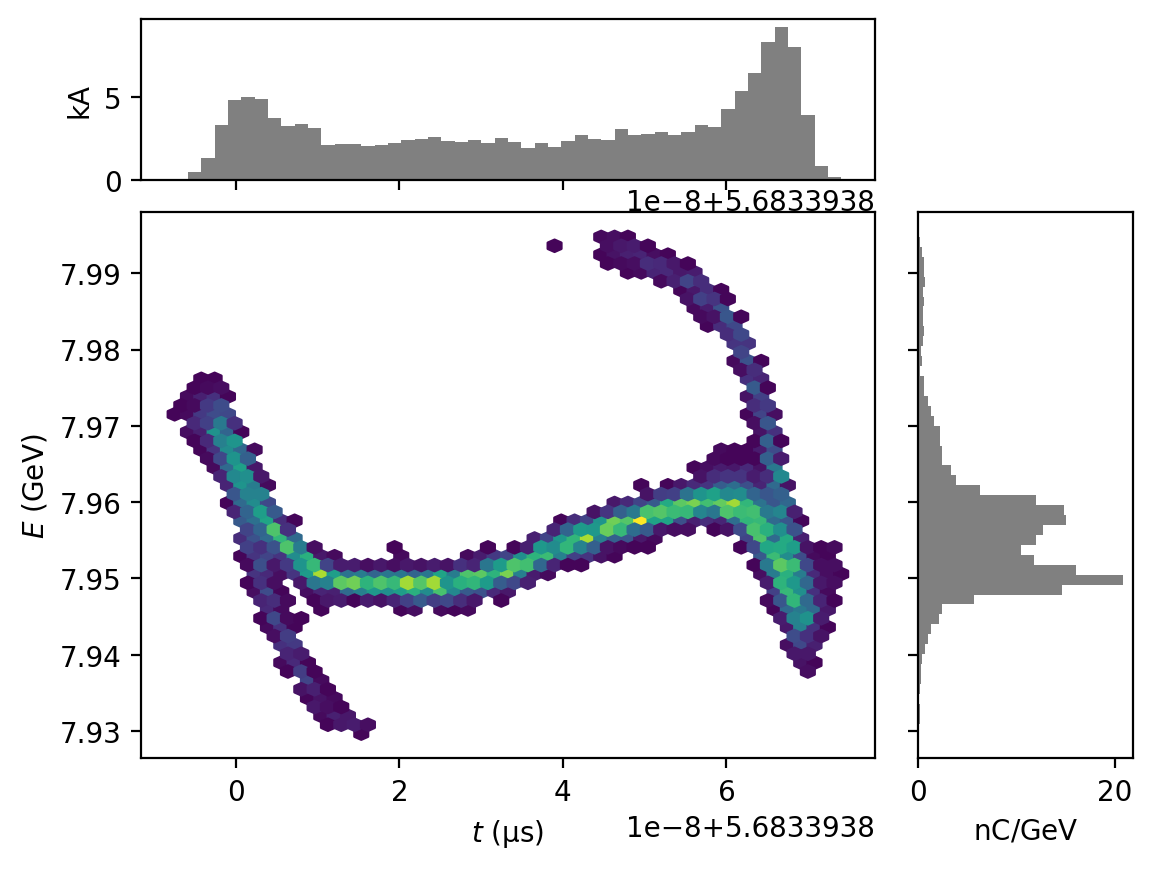

In [31]:
P.plot('t', 'energy')

In [32]:
# Make a function for this
def get_beam(ele):
    P = ParticleGroup(data=tao.bunch_data(ele))
    # Select out live particles
    P = P[P.status==1]    
    
    return P

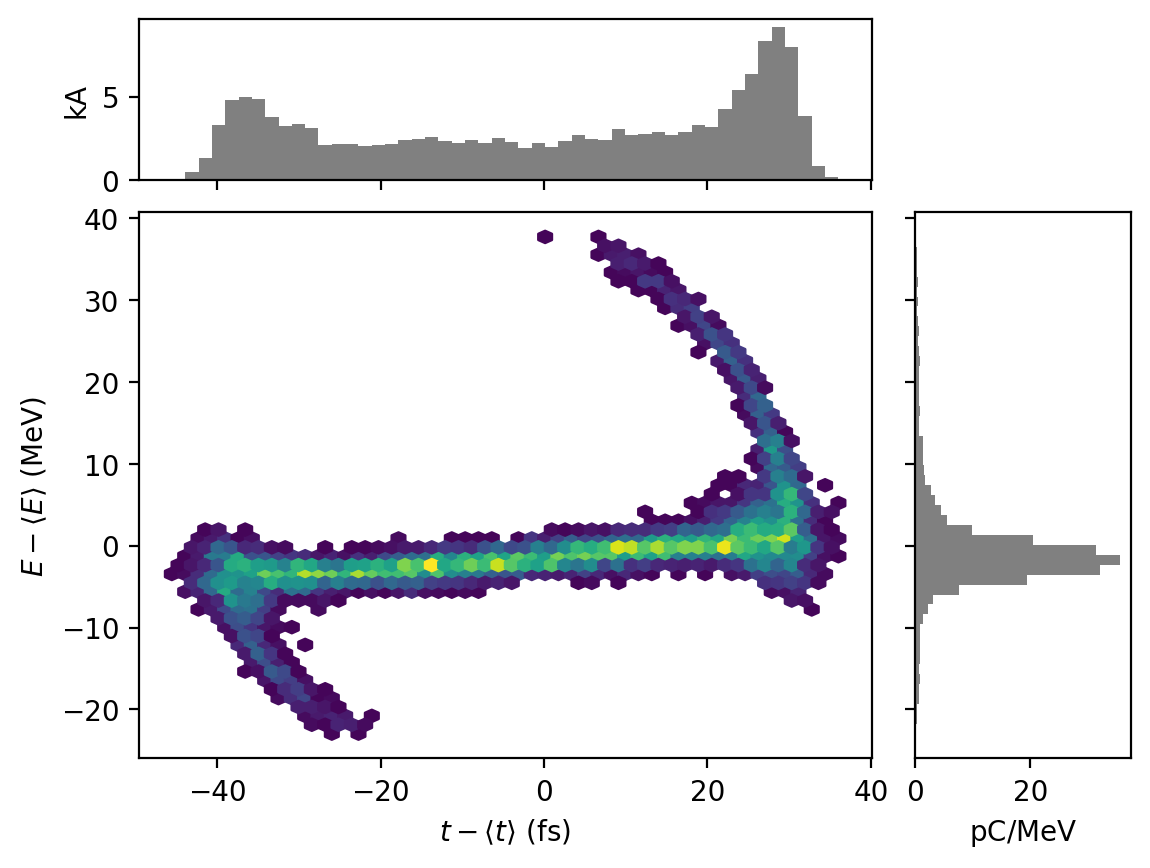

In [33]:
P1 = get_beam('BEGUNDH')
P1.plot('delta_t', 'delta_energy')

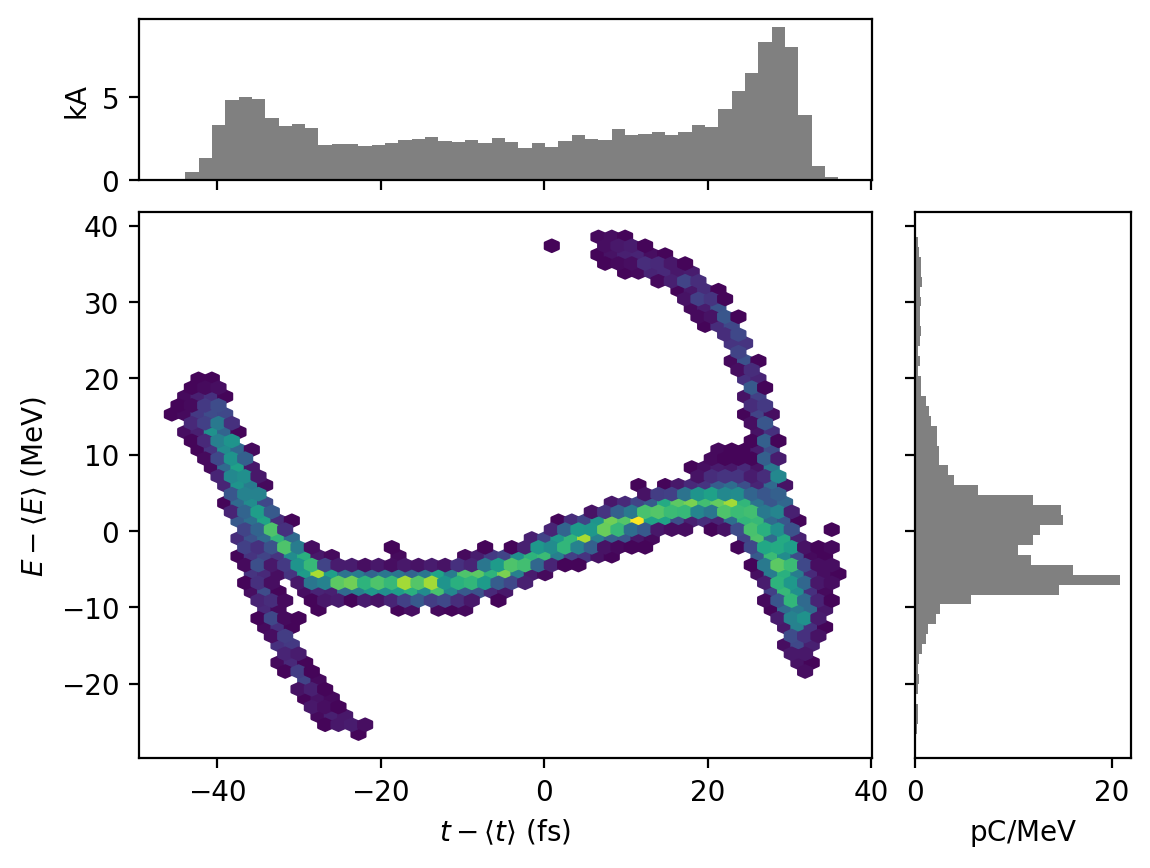

In [34]:
P2 = get_beam('ENDUNDH')
P2.plot('delta_t', 'delta_energy')

In [35]:
%%tao
sho beam 2823

-------------------------
Tao> sho beam 2823
Bunch parameters at: UMAHXH44#1 (2823)
  Parameters for bunch:       1
  S-position:                   1.67456007E+03
  In branch:                  0
  Particles surviving:        10000
  Particles lost:             0
  Particles lost (%):         .000
  Charge live (C):              2.50000000E-10
  Centroid:  1.24764174E-07 -1.36726523E-08  8.28540043E-08  1.69519230E-08 -4.71931618E-05 -3.13232434E-03
  RMS:       2.75579194E-05  1.80187431E-06  2.54548170E-05  2.42294580E-06  7.33398449E-06  9.25509662E-04

               norm_emitt            emit            beta           alpha
  a:         4.77960388E-07  3.06255864E-11  2.03689483E+01  1.03694073E+00
  b:         5.09140558E-07  3.26234737E-11  1.66683970E+01 -1.34977282E+00
  x:         4.83507584E-07  3.09810262E-11  2.44987414E+01  1.24972339E+00
  y:         5.03788572E-07  3.22805421E-11  2.00678566E+01 -1.62774258E+00
  z:         8.90634062E-05  5.70678891E-09  9.42514773E-03


In [38]:
# Compare on the same plot
k1= 'delta_t'
k2 = 'delta_energy'
plt.scatter(P1[k1], P1[k2], marker='.', alpha=0.1)
plt.scatter(P2[k1], P2[k2], marker='.', alpha=0.1)
plt.xlabel(f'{k1} ({P1.units(k1).unitSymbol})')
plt.ylabel(f'{k2} ({P1.units(k2).unitSymbol})')

NameError: name 'plt' is not defined

# Get giant table of bunch stats

In [37]:
import pandas as pd

In [ ]:
# Get list of indices
IX = tao.lat_list('*', 'ele.ix_ele')

# Stop before the dump
S_STOP = tao.ele_head('ENDUNDH')['s']

stats = []
for ele in IX:
    d = tao.bunch_params(ele)
    # Skipl ones with no beam
    if d['charge_live'] == 0:
        continue
    
    if d['s'] > S_STOP:
        break
        
    stats.append(d)

df = pd.DataFrame(stats)#.set_index('ix_ele')


In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(df['s'], df['sigma_x']*1e6, label=r'$\sigma_x$')
plt.plot(df['s'], df['sigma_y']*1e6, label=r'$\sigma_y$')
plt.xlabel('s (m)')
plt.ylabel('beam sizes (µm)')
plt.legend();

In [ ]:
# Get an array of where the beam is saved
s_saved = np.array(df[df['beam_saved']]['s'])

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(df['s'], df['norm_emit_x']*1e6, label=r'$\epsilon_{n,x}$')
plt.plot(df['s'], df['norm_emit_y']*1e6, label=r'$\epsilon_{n,y}$')
plt.xlabel('s (m)')
plt.ylabel('Beam emittance(mm-mrad)')


# This is where the beam is saved
plt.scatter(s_saved, np.ones(len(s_saved))*0, color = 'black', marker = 'x')


plt.legend();